In [86]:
# Import the modules
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf

In [87]:
# Read the csv file into a pandas DataFrame
Denver_crime = pd.read_csv(
    Path("crime.csv"), encoding='iso-8859-1'
)

# Review the DataFrame
Denver_crime.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411,barnum,1,0,1
4,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1


In [88]:
Denver_crime.columns

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic', 'victim_count'],
      dtype='object')

In [89]:
# Read the csv file into a pandas DataFrame
offense_codes = pd.read_csv(
    Path("offense_codes (1).csv"), encoding='iso-8859-1'
)

# Review the DataFrame
offense_codes.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [90]:
offense_codes.columns

Index(['OBJECTID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION', 'OFFENSE_TYPE_ID',
       'OFFENSE_TYPE_NAME', 'OFFENSE_CATEGORY_ID', 'OFFENSE_CATEGORY_NAME',
       'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [91]:
offense_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   OBJECTID                300 non-null    int64 
 1   OFFENSE_CODE            300 non-null    int64 
 2   OFFENSE_CODE_EXTENSION  300 non-null    int64 
 3   OFFENSE_TYPE_ID         300 non-null    object
 4   OFFENSE_TYPE_NAME       300 non-null    object
 5   OFFENSE_CATEGORY_ID     300 non-null    object
 6   OFFENSE_CATEGORY_NAME   300 non-null    object
 7   IS_CRIME                300 non-null    int64 
 8   IS_TRAFFIC              300 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.2+ KB


In [92]:
Denver_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             386865 non-null  int64  
 1   offense_id              386865 non-null  int64  
 2   offense_code            386865 non-null  int64  
 3   offense_code_extension  386865 non-null  int64  
 4   offense_type_id         386865 non-null  object 
 5   offense_category_id     386865 non-null  object 
 6   first_occurrence_date   386865 non-null  object 
 7   last_occurrence_date    211309 non-null  object 
 8   reported_date           386865 non-null  object 
 9   incident_address        371362 non-null  object 
 10  geo_x                   371362 non-null  float64
 11  geo_y                   371362 non-null  float64
 12  geo_lon                 371096 non-null  float64
 13  geo_lat                 371096 non-null  float64
 14  district_id         

In [93]:
clean_crime = Denver_crime.drop(['is_crime', 'is_traffic', 'geo_x', 'incident_id', 'offense_id', 'geo_y', 'last_occurrence_date', 'first_occurrence_date'], axis=1)

# Display the first few rows of the DataFrame to verify the changes
clean_crime.head()

,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,victim_count
0,2999,0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,-104.998910,39.733957,1,123,lincoln-park,1
1,2999,0,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,815 16TH ST,-104.993342,39.746248,6,611,cbd,1
2,2999,0,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,-105.025520,39.782888,1,111,berkeley,1
3,2999,0,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,-105.025330,39.715357,4,411,barnum,1
4,2999,0,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,-104.845074,39.783082,5,521,montbello,1


In [94]:
print(clean_crime.columns)

Index(['offense_code', 'offense_code_extension', 'offense_type_id',
       'offense_category_id', 'reported_date', 'incident_address', 'geo_lon',
       'geo_lat', 'district_id', 'precinct_id', 'neighborhood_id',
       'victim_count'],
      dtype='object')


In [95]:
# list of categorical columns
Crime_cat = ['offense_type_id', 'offense_category_id', 'district_id','neighborhood_id']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(clean_crime[Crime_cat]))

# Get the feature names for the encoded variables
encoded_feature_names = enc.get_feature_names_out(input_features=Crime_cat)

# Add the encoded variable names to the dataframe
encode_df.columns = encoded_feature_names

# Combine the encoded columns with the original DataFrame
#clean_crime = clean_crime.drop(columns=Crime_cat)  # Drop original categorical columns
clean_crime = clean_crime.merge(encode_df,left_index=True, right_index=True)

# Display the head of the encoded DataFrame
clean_crime.head()

C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,...,neighborhood_id_washington-park,neighborhood_id_washington-park-west,neighborhood_id_washington-virginia-vale,neighborhood_id_wellshire,neighborhood_id_west-colfax,neighborhood_id_west-highland,neighborhood_id_westwood,neighborhood_id_whittier,neighborhood_id_windsor,neighborhood_id_nan
0,2999,0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,-104.998910,39.733957,1,123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2999,0,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,815 16TH ST,-104.993342,39.746248,6,611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2999,0,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,-105.025520,39.782888,1,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2999,0,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,-105.025330,39.715357,4,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2999,0,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,-104.845074,39.783082,5,521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Merge one-hot encoded features and drop the originals
#clean_crime = clean_crime.merge(encode_df,left_index=True, right_index=True)

#clean_crime.head()

In [97]:
clean_offense = offense_codes.drop(['IS_CRIME','IS_TRAFFIC'], axis=1)

# Display the first few rows of the DataFrame to verify the changes
clean_offense.head()

,OBJECTID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder


In [98]:
clean_offense.rename(columns={
    'OBJECTID': 'objectid',
    'OFFENSE_CODE': 'offense_code',
    'OFFENSE_CODE_EXTENSION': 'offense_code_extension',
    'OFFENSE_TYPE_ID': 'offense_type_id',
    'OFFENSE_CATEGORY_ID': 'offense_category_id',
    'OFFENSE_TYPE_NAME': 'offense_type_name',
    'OFFENSE_CATEGORY_NAME': 'offense_category_name'
}, inplace=True)

# Display the DataFrame to verify the changes
clean_offense.head()

,objectid,offense_code,offense_code_extension,offense_type_id,offense_type_name,offense_category_id,offense_category_name
0,1,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes
1,2,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes
2,3,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder
3,4,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder
4,5,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder


In [99]:
merged_df = pd.read_csv(
    Path("crimes_and_offenses.csv"), encoding='iso-8859-1'
)
merged_df.head()

,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,victim_count,offense_type_name
0,2999,0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,-104.998910,39.733957,1,123.0,lincoln-park,1.0,Criminal mischief - other
1,2999,0,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,815 16TH ST,-104.993342,39.746248,6,611.0,cbd,1.0,Criminal mischief - other
2,2999,0,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,-105.025520,39.782888,1,111.0,berkeley,1.0,Criminal mischief - other
3,2999,0,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,-105.025330,39.715357,4,411.0,barnum,1.0,Criminal mischief - other
4,2999,0,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,-104.845074,39.783082,5,521.0,montbello,1.0,Criminal mischief - other


In [100]:
# list of categorical columns
Crimes_and_offenses_cat = ['offense_type_id', 'offense_category_id', 'district_id','neighborhood_id']

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged_df[Crimes_and_offenses_cat]))

# Get the feature names for the encoded variables
encoded_feature_names = enc.get_feature_names_out(input_features=Crime_cat)

# Add the encoded variable names to the dataframe
encode_df.columns = encoded_feature_names

# Combine the encoded columns with the original DataFrame
#clean_crime = clean_crime.drop(columns=Crime_cat)  # Drop original categorical columns
merged_df2 = merged_df.merge(encode_df,left_index=True, right_index=True)

# Display the head of the encoded DataFrame
merged_df2.head()

C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,...,neighborhood_id_washington-park,neighborhood_id_washington-park-west,neighborhood_id_washington-virginia-vale,neighborhood_id_wellshire,neighborhood_id_west-colfax,neighborhood_id_west-highland,neighborhood_id_westwood,neighborhood_id_whittier,neighborhood_id_windsor,neighborhood_id_nan
0,2999,0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,-104.998910,39.733957,1,123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2999,0,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,815 16TH ST,-104.993342,39.746248,6,611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2999,0,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,-105.025520,39.782888,1,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2999,0,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,-105.025330,39.715357,4,411.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2999,0,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,-104.845074,39.783082,5,521.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
clean_crime.columns

Index(['offense_code', 'offense_code_extension', 'offense_type_id',
       'offense_category_id', 'reported_date', 'incident_address', 'geo_lon',
       'geo_lat', 'district_id', 'precinct_id',
       ...
       'neighborhood_id_washington-park',
       'neighborhood_id_washington-park-west',
       'neighborhood_id_washington-virginia-vale', 'neighborhood_id_wellshire',
       'neighborhood_id_west-colfax', 'neighborhood_id_west-highland',
       'neighborhood_id_westwood', 'neighborhood_id_whittier',
       'neighborhood_id_windsor', 'neighborhood_id_nan'],
      dtype='object', length=300)

In [102]:
murder_count = clean_crime['victim_count'].value_counts()

murder_count

victim_count
1     381901
2       3594
3        732
4        274
5        167
6         81
7         50
8         27
9         13
14         5
10         5
11         4
13         4
12         3
16         2
15         1
17         1
19         1
Name: count, dtype: int64

In [103]:
sorted_df = clean_crime.sort_values(by='victim_count', ascending=False)

sorted_df

,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,...,neighborhood_id_washington-park,neighborhood_id_washington-park-west,neighborhood_id_washington-virginia-vale,neighborhood_id_wellshire,neighborhood_id_west-colfax,neighborhood_id_west-highland,neighborhood_id_westwood,neighborhood_id_whittier,neighborhood_id_windsor,neighborhood_id_nan
132607,1315,2,menacing-felony-w-weap,aggravated-assault,8/28/2022 11:39:00 PM,629 E COLFAX AVE,-104.979024,39.740146,6,621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125758,1315,0,aggravated-assault,aggravated-assault,7/9/2022 4:53:00 AM,2700 BLK LARIMER ST,-104.983941,39.760046,2,211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333561,1314,2,weapon-fire-into-occ-bldg,aggravated-assault,1/31/2023 7:43:00 PM,750 S LOWELL BLVD,-105.034200,39.702891,4,412,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
123483,1314,2,weapon-fire-into-occ-bldg,aggravated-assault,2/11/2021 2:07:00 AM,5855 W HAMPDEN AVE,-105.057143,39.654277,4,423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123631,1314,2,weapon-fire-into-occ-bldg,aggravated-assault,3/9/2021 11:33:00 PM,3305 W VIRGINIA AVE,-105.030299,39.707926,4,412,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130201,1315,1,aggravated-assault-dv,aggravated-assault,2/8/2021 2:01:00 AM,NaN,NaN,NaN,1,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130200,1315,1,aggravated-assault-dv,aggravated-assault,1/1/2021 3:19:00 AM,NaN,NaN,NaN,6,623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130199,1315,1,aggravated-assault-dv,aggravated-assault,5/15/2020 6:08:00 PM,NaN,NaN,NaN,1,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130198,1315,1,aggravated-assault-dv,aggravated-assault,1/25/2021 2:11:00 PM,NaN,NaN,NaN,3,313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
print(clean_crime.columns)

Index(['offense_code', 'offense_code_extension', 'offense_type_id',
       'offense_category_id', 'reported_date', 'incident_address', 'geo_lon',
       'geo_lat', 'district_id', 'precinct_id',
       ...
       'neighborhood_id_washington-park',
       'neighborhood_id_washington-park-west',
       'neighborhood_id_washington-virginia-vale', 'neighborhood_id_wellshire',
       'neighborhood_id_west-colfax', 'neighborhood_id_west-highland',
       'neighborhood_id_westwood', 'neighborhood_id_whittier',
       'neighborhood_id_windsor', 'neighborhood_id_nan'],
      dtype='object', length=300)


C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


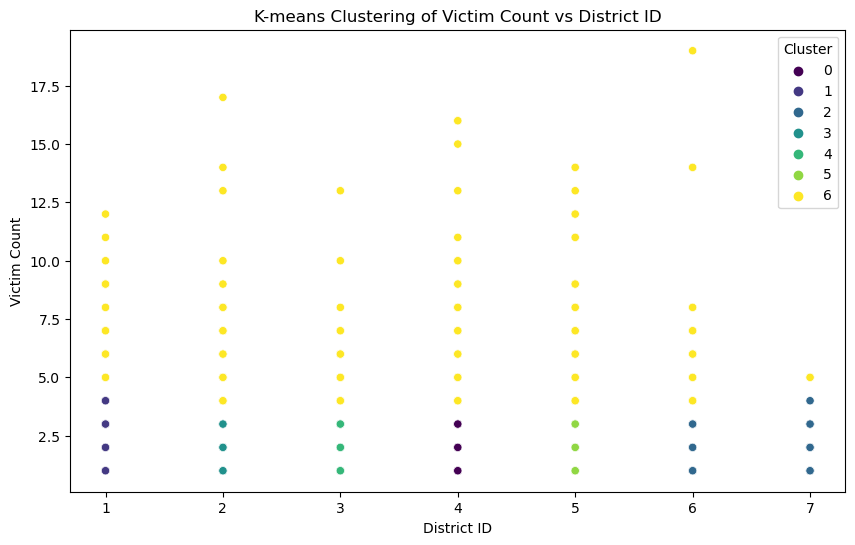

In [105]:
# Ensure the columns are of the correct type
clean_crime['district_id'] = pd.to_numeric(clean_crime['district_id'], errors='coerce')
clean_crime['victim_count'] = pd.to_numeric(clean_crime['victim_count'], errors='coerce')

# Drop rows with NaN values in critical columns
clean_crime.dropna(subset=['district_id', 'victim_count'], inplace=True)

# Feature selection: Use 'district_id' and 'victim_count' for clustering
X = clean_crime[['district_id', 'victim_count']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)   
kmeans.fit(X)

# Add the cluster labels to the original dataframe
clean_crime['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_crime, x='district_id', y='victim_count', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Victim Count vs District ID')
plt.xlabel('District ID')
plt.ylabel('Victim Count')
plt.legend(title='Cluster')
plt.show()

C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


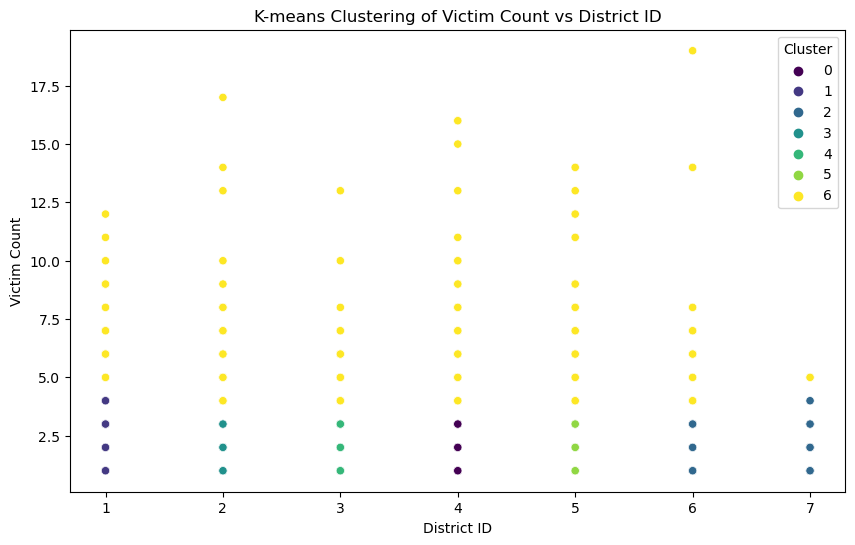

In [106]:
# Ensure the columns are of the correct type
clean_crime['district_id'] = pd.to_numeric(clean_crime['district_id'], errors='coerce')
clean_crime['victim_count'] = pd.to_numeric(clean_crime['victim_count'], errors='coerce')

# Drop rows with NaN values in critical columns
clean_crime.dropna(subset=['district_id', 'victim_count'], inplace=True)

# Feature selection: Use 'district_id' and 'victim_count' for clustering
X = clean_crime[['district_id', 'victim_count']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original dataframe
clean_crime['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_crime, x='district_id', y='victim_count', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Victim Count vs District ID')
plt.xlabel('District ID')
plt.ylabel('Victim Count')
plt.legend(title='Cluster')
plt.show()

In [107]:
# Drop rows with NaN values in critical columns
#drop_crime = .dropna(subset=['offense_code', 'offense_type_id','offense_code_extension', 'geo_lon', 'geo_lat', 'precinct_id', 'victim_count'], inplace=True)

In [108]:
clean_crime['offense_category_id'].unique()


array(['public-disorder', 'drug-alcohol', 'sexual-assault',
       'other-crimes-against-persons', 'all-other-crimes',
       'white-collar-crime', 'murder', 'robbery', 'aggravated-assault',
       'arson', 'burglary', 'larceny', 'theft-from-motor-vehicle',
       'auto-theft'], dtype=object)

In [109]:
clean_crime.head()

,offense_code,offense_code_extension,offense_type_id,offense_category_id,reported_date,incident_address,geo_lon,geo_lat,district_id,precinct_id,...,neighborhood_id_washington-park-west,neighborhood_id_washington-virginia-vale,neighborhood_id_wellshire,neighborhood_id_west-colfax,neighborhood_id_west-highland,neighborhood_id_westwood,neighborhood_id_whittier,neighborhood_id_windsor,neighborhood_id_nan,cluster
0,2999,0,criminal-mischief-other,public-disorder,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,-104.998910,39.733957,1.0,123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2999,0,criminal-mischief-other,public-disorder,7/8/2021 12:55:00 AM,815 16TH ST,-104.993342,39.746248,6.0,611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2999,0,criminal-mischief-other,public-disorder,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,-105.025520,39.782888,1.0,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2999,0,criminal-mischief-other,public-disorder,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,-105.025330,39.715357,4.0,411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2999,0,criminal-mischief-other,public-disorder,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,-104.845074,39.783082,5.0,521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [110]:
# Drop rows with missing values in 'victim_count' and 'offense_code' columns
merged_df = merged_df.dropna(subset=['victim_count', 'offense_code', 'district_id'])

C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


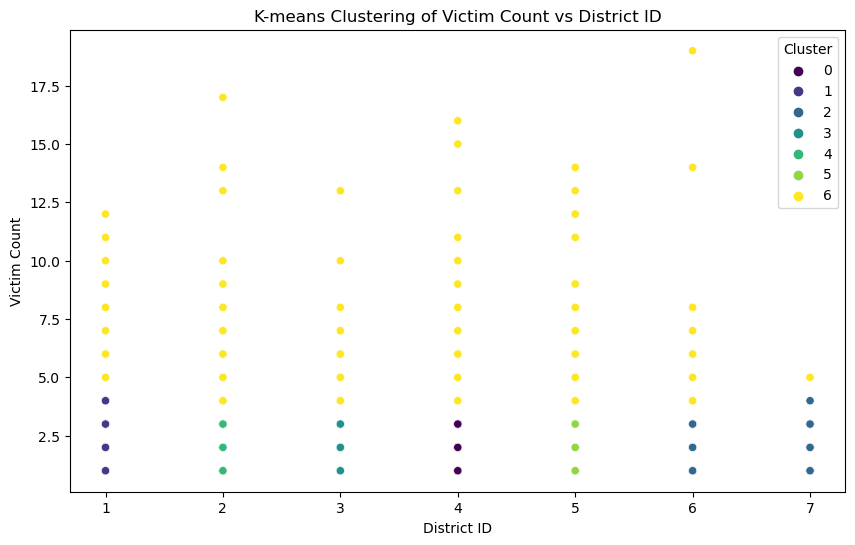

In [111]:
# Ensure the columns are of the correct type
merged_df['district_id'] = pd.to_numeric(merged_df['district_id'], errors='coerce')
merged_df['victim_count'] = pd.to_numeric(merged_df['victim_count'], errors='coerce')

# Drop rows with NaN values in critical columns
merged_df.dropna(subset=['district_id', 'victim_count'], inplace=True)

# Feature selection: Use 'district_id' and 'victim_count' for clustering
X = merged_df[['district_id', 'victim_count']]

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=7, random_state=42)   
kmeans.fit(X)

# Add the cluster labels to the original dataframe
merged_df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='district_id', y='victim_count', hue='cluster', palette='viridis')
plt.title('K-means Clustering of Victim Count vs District ID')
plt.xlabel('District ID')
plt.ylabel('Victim Count')
plt.legend(title='Cluster')
plt.show()

**Evaluating Crime count as a new variable to track crime**

In [114]:
crime_count = merged_df.groupby('neighborhood_id').size().reset_index(name='crime_count')
crime_count_df = pd.DataFrame(crime_count)
crime_count_df = crime_count_df.sort_values(by='crime_count', ascending=False)
# Initalize labelEncoder
label_encoder = LabelEncoder()
#Apply LabelEncoder to the 'neighborhood_id' column
crime_count_df['neighborhood_id_encoded'] = label_encoder.fit_transform(crime_count_df['neighborhood_id'])

crime_count_df.head()

,neighborhood_id,crime_count,neighborhood_id_encoded
26,five-points,23073,26
10,central-park,17856,10
8,capitol-hill,14655,8
9,cbd,14651,9
23,dia,14640,23


In [75]:
crime_count = merged_df.groupby('district_id').size().reset_index(name='crime_count')
crime_count_district_df = pd.DataFrame(crime_count)
crime_count_district_df = crime_count_df.sort_values(by='crime_count', ascending=False)
crime_count_district_df.head()

,district_id,crime_count,cluster
2,3.0,86888,2
5,6.0,85911,2
0,1.0,58880,0
1,2.0,54072,0
3,4.0,45873,0


C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


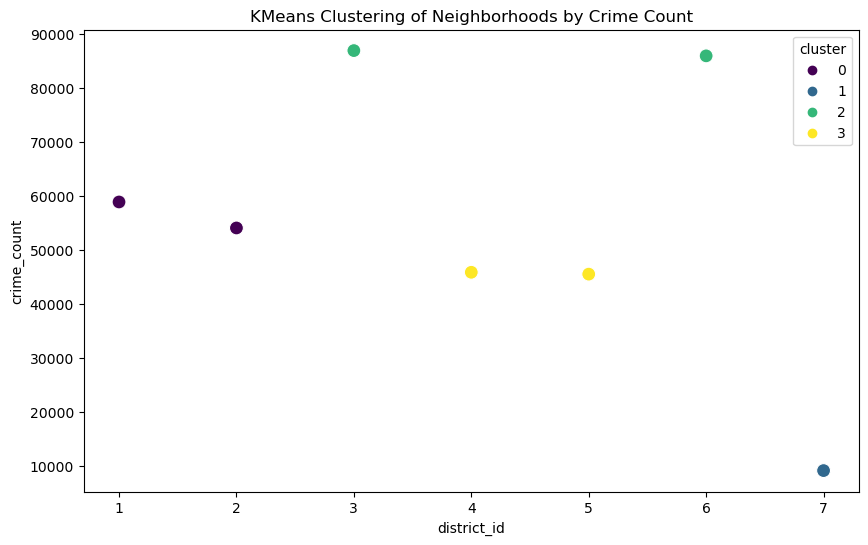

In [81]:
# Prepare data for clustering
X = crime_count_district_df[['crime_count']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
crime_count_district_df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the DataFrame with cluster labels
crime_count_df.head()

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_count_district_df, x='district_id', y='crime_count', hue='cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Neighborhoods by Crime Count')
plt.show()

C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jordan\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


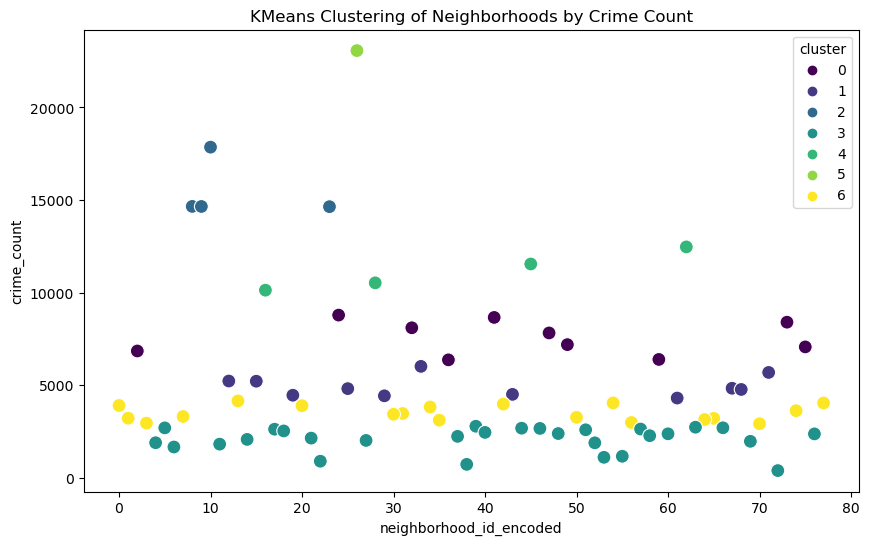

In [116]:
# Prepare data for clustering
X = crime_count_df[['crime_count']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
crime_count_df['cluster'] = kmeans.fit_predict(X_scaled)

# Display the DataFrame with cluster labels
crime_count_df.head()

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crime_count_df, x='neighborhood_id_encoded', y='crime_count', hue='cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Neighborhoods by Crime Count')
plt.show()

In [66]:
# Separate features and target
y = merged_df2['victim_count']

X = merged_df2['offense_code']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 0.010928195254236273


Evaluating victim_count to district_id

In [38]:
# Separate features and target
y = merged_df['victim_count']

X = merged_df['district_id']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: -1.6398367205017195e-05


Evaluating Neighborhood ID neighborhood_id_washington-park

In [43]:
# Separate features and target
y = merged_df2['victim_count']

X = merged_df2['neighborhood_id_washington-park']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 1.034906330710239e-05


Evaluating Neighborhood ID neighborhood_id_washington-park-west

In [47]:
# Separate features and target
y = merged_df2['victim_count']

X = merged_df2['neighborhood_id_washington-park-west']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 3.256192624001564e-05


Evaluating Neighborhood ID neighborhood_id_washington-virginia-value

In [49]:
# Separate features and target
y = merged_df2['victim_count']

X = merged_df2['neighborhood_id_washington-virginia-vale']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 5.354886527864089e-06


Evaluating Cluster column

In [53]:
# Separate features and target
y = merged_df2['victim_count']

X = merged_df2['cluster']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 0.0036329359531453997


evaluating offense_code and district_id

In [57]:
# Separate features and target
y = merged_df2['district_id']

X = merged_df2['offense_code']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 0.0037375747706733797


Linear Regression review of crime_count to neighborhood_id_encoded


In [120]:
# Separate features and target
y = crime_count_df['crime_count']

X = crime_count_df['neighborhood_id_encoded']

# Handle categorical variables using OneHotEncoder
#categorical_features = ['offense_category_id', 'incident_address', 'district_id', 'neighborhood_id']
#preprocessor = ColumnTransformer(
   # transformers=[
    #    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
   # ],
   # remainder='passthrough'  # Keep other columns as they are
#)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

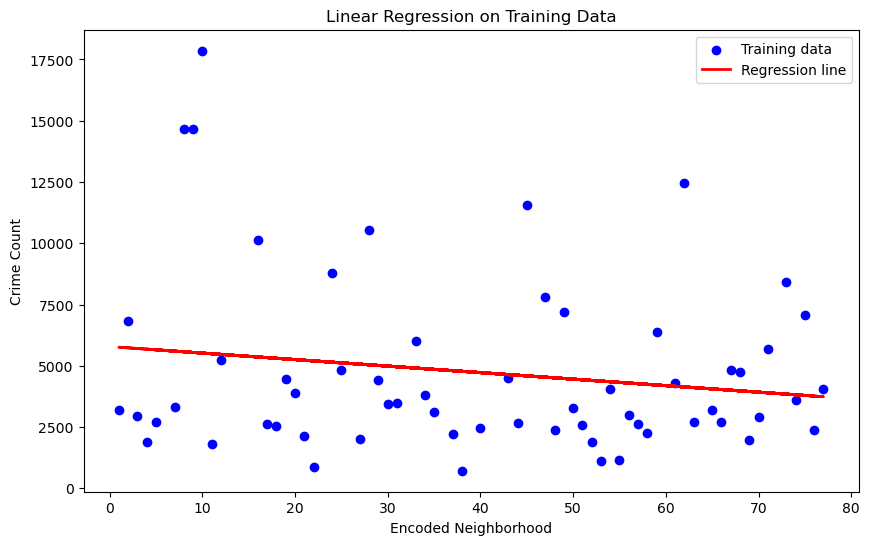

R^2 score: 0.002166884853553319


In [121]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the training data
y_train_pred = model.predict(X_train)

# Plotting the regression line with the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Encoded Neighborhood')
plt.ylabel('Crime Count')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

# Evaluate the model
score = model.score(X_test, y_test)
print(f'R^2 score: {score}')